In [3]:
import matplotlib as mpl

fsize = 16
mpl.rcParams['legend.fontsize'] = fsize
mpl.rcParams["figure.figsize"] = (12,10)
mpl.rcParams['axes.labelsize'] = fsize
mpl.rcParams['xtick.labelsize'] = fsize
mpl.rcParams['ytick.labelsize'] = fsize
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams.update({'font.size': fsize})

import matplotlib.pyplot as plt
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import datetime
import re

0.06405042455805064
0.0004599319970703849
4.9996878559999995
2.6381115670058096e-05


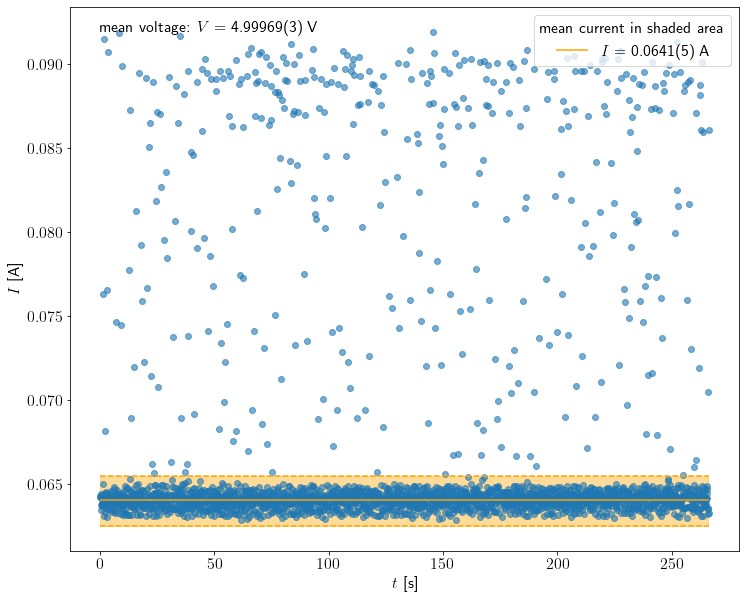

In [5]:
#normal_working_conditions
data = np.genfromtxt('CW_booting.csv', delimiter=",", dtype=[('I', float), ('V', float), ('t', 'U8'), ('t_f', float)], usecols=[1,3,8,9], skip_header=4)

def get_seconds(t): #t fomated as H:M:S
    H,M,S = t.split(':')
    return int(datetime.timedelta(hours=int(H),minutes=int(M),seconds=int(S)).total_seconds())

'''error_t_id = None

for t_id in range(len(data['t'])-1):
    min_diff = int(data['t'][t_id+1].split(':')[1]) - int(data['t'][t_id].split(':')[1])
    if min_diff < 0:
        print(t_id)
        print(int(data['t'][t_id+1].split(':')[1]))
        print(int(data['t'][t_id].split(':')[1]))
        error_t_id = t_id

data = data[error_t_id+1:]
print(data)'''

t_0 = get_seconds(data['t'][0])+data['t_f'][0]
t_elapsed = np.vectorize(get_seconds)(data['t'])+data['t_f']-t_0
t_elapsed -= min(t_elapsed)

fig, ax = plt.subplots()
#ax1 = ax.twinx()  # instantiate a second axes that shares the same x-axis

#ax1.scatter(t_elapsed, data['V'], color='orange', label=r"$V$ [V]")

ax.set_xlabel(r"$t$ [s]")
ax.set_ylabel(r"$I$ [A]")

I_upper = 0.0655
I_lower = 0.0625
I_mean_values = list()
I_event_values = list()
for I_val in data['I']:
    if I_lower <= I_val <= I_upper:
        I_mean_values.append(I_val)
    else:
        I_event_values.append(I_val)

I_mean = np.mean(I_mean_values)
I_std = np.std(I_mean_values)
V_mean = np.mean(data['V'])
V_std = np.std(data['V'])

print(I_mean)
print(I_std)
print(V_mean)
print(V_std)

tf = max(t_elapsed)

ax.fill_between(x=np.arange(0, tf), y1=I_upper, y2=I_lower, color='orange',  interpolate=True, alpha=.4)

ax.scatter(t_elapsed, data['I'], alpha=0.6)

#get V_std order of magnitud
exponent = int(re.search(r'e([-+]?\d+)', "{:.2e}".format(V_std))[1])
#get error first non-zero value
V_std_first_digit = round(V_std*10**np.abs(exponent))

V_str = r"$V=$ "+str(round(V_mean,abs(exponent)))+"("+str(V_std_first_digit)+") V"
ax.text(x=min(t_elapsed), y=max(data['I']), s="mean voltage: "+V_str)

#get I_std order of magnitud
exponent = int(re.search(r'e([-+]?\d+)', "{:.2e}".format(I_std))[1])
#get error first non-zero value
I_std_first_digit = round(I_std*10**np.abs(exponent))

I_str = r"$I=$ "+str(round(I_mean,abs(exponent)))+"("+str(I_std_first_digit)+") A"
ax.hlines(I_upper, xmin=0, xmax=tf, color="orange", ls='--')
ax.hlines(I_mean, xmin=0, xmax=tf, color="orange", label=I_str)
ax.hlines(I_lower, xmin=0, xmax=tf, color="orange", ls='--')

ax.legend(loc="upper right", title="mean current in shaded area")

407


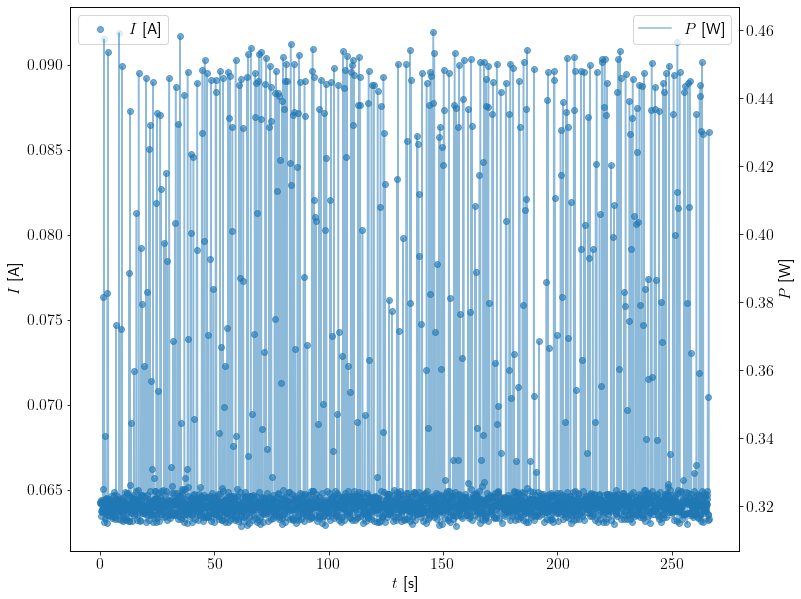

In [194]:
power = data['I']*data['V']

fig, ax = plt.subplots()
ax1 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax1.plot(t_elapsed, power, alpha=0.5, label=r"$P$ [W]")
ax.scatter(t_elapsed, data['I'], label=r"$I$ [A]", alpha=0.6)

ax.set_xlabel(r"$t$ [s]")
ax.set_ylabel(r"$I$ [A]")
ax1.set_ylabel(r"$P$ [W]")

ax.legend(loc='upper left')
ax1.legend(loc='upper right')